In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file
df=pd.read_csv('/content/cleaned_insurance_data.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19.0,1,27.900,0.0,1,southwest,16884.92400
1,18.0,0,33.770,1.0,0,southeast,1725.55230
2,28.0,0,33.000,3.0,0,southeast,4449.46200
3,33.0,0,22.705,0.0,0,northwest,21984.47061
4,32.0,0,28.880,0.0,0,northwest,3866.85520
5,31.0,1,25.740,0.0,0,southeast,3756.62160
6,46.0,1,33.440,1.0,0,southeast,8240.58960
7,37.0,1,27.740,3.0,0,northwest,7281.50560
8,37.0,0,29.830,2.0,0,northeast,6406.41070
9,60.0,1,25.840,0.0,0,northwest,28923.13692


In [3]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


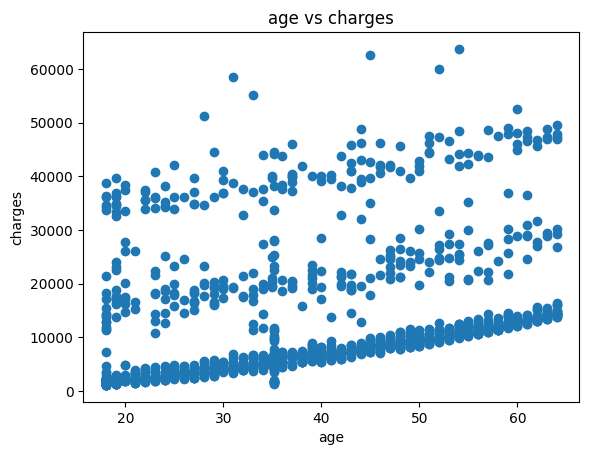

In [6]:
#We do Exploratory data analysis
plt.scatter(x='age',y='charges',data=df)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')
plt.show()

Text(0.5, 1.0, 'sex vs charges')

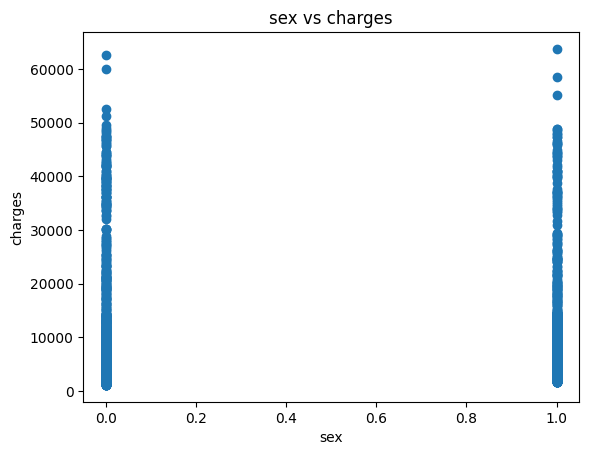

In [7]:
plt.scatter(x='sex',y='charges',data=df)
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('sex vs charges')

In [29]:
df['children'].value_counts()

,count
children,
0.0,570
1.0,304
2.0,217
3.0,142
4.0,23
5.0,16


In [28]:
df['children'] = df['children'].abs()

Text(0.5, 1.0, 'children vs charges')

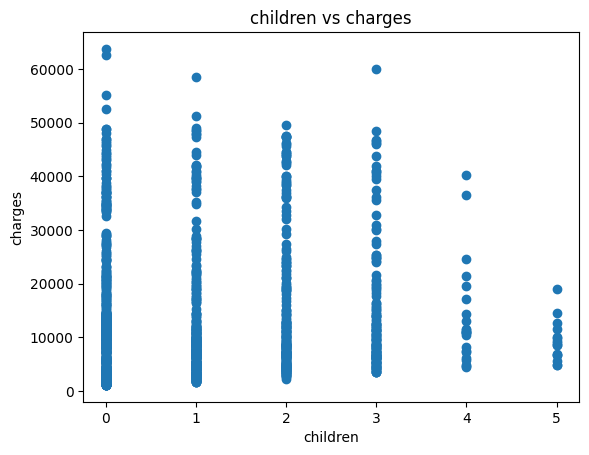

In [30]:
plt.scatter(x='children',y='charges',data=df)
plt.xlabel('children')
plt.ylabel('charges')
plt.title('children vs charges')

Text(0.5, 1.0, 'bmi vs charges')

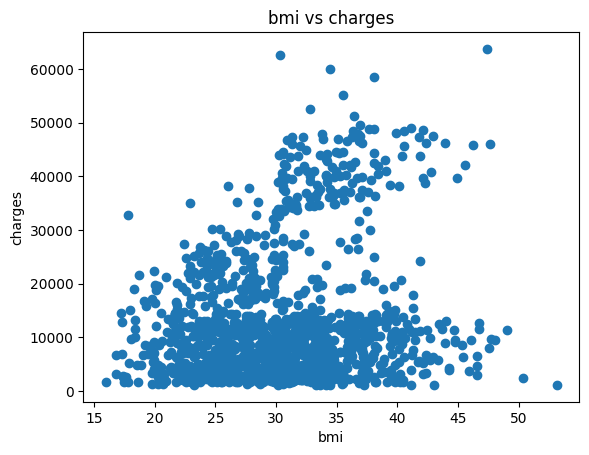

In [31]:
plt.scatter(x='bmi',y='charges',data=df)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')

Text(0.5, 1.0, 'smoker vs charges')

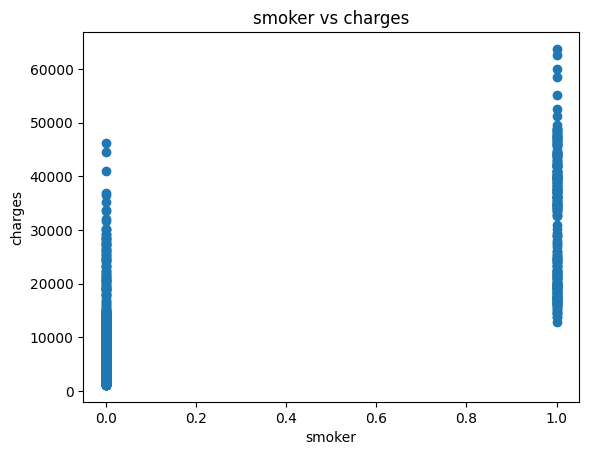

In [32]:
plt.scatter(x='smoker',y='charges',data=df)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges')

Text(0.5, 1.0, 'region vs charges')

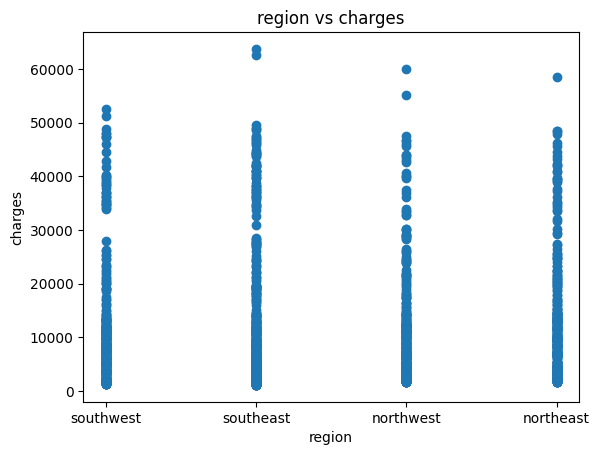

In [33]:
plt.scatter(x='region',y='charges',data=df)
plt.xlabel('region')
plt.ylabel('charges')
plt.title('region vs charges')

In [34]:
#One hot encoding for region column
df = pd.get_dummies(df, prefix=['region'], columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,chidren,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,0.0,False,False,False,True
1,18.0,0,33.770,1.0,0,1725.55230,1.0,False,False,True,False
2,28.0,0,33.000,3.0,0,4449.46200,3.0,False,False,True,False
3,33.0,0,22.705,0.0,0,21984.47061,0.0,False,True,False,False
4,32.0,0,28.880,0.0,0,3866.85520,0.0,False,True,False,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1272 non-null   float64
 1   sex               1272 non-null   int64  
 2   bmi               1272 non-null   float64
 3   children          1272 non-null   float64
 4   smoker            1272 non-null   int64  
 5   charges           1272 non-null   float64
 6   chidren           1272 non-null   float64
 7   region_northeast  1272 non-null   bool   
 8   region_northwest  1272 non-null   bool   
 9   region_southeast  1272 non-null   bool   
 10  region_southwest  1272 non-null   bool   
dtypes: bool(4), float64(5), int64(2)
memory usage: 74.7 KB


In [37]:
#Converting one hot encoding from true false to binary 0 and 1
for column in df.columns:
  if df[column].dtype == bool:
    df[column] = df[column].astype(int)

In [38]:
df.head()

,age,sex,bmi,children,smoker,charges,chidren,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,1,27.900,0.0,1,16884.92400,0.0,0,0,0,1
1,18.0,0,33.770,1.0,0,1725.55230,1.0,0,0,1,0
2,28.0,0,33.000,3.0,0,4449.46200,3.0,0,0,1,0
3,33.0,0,22.705,0.0,0,21984.47061,0.0,0,1,0,0
4,32.0,0,28.880,0.0,0,3866.85520,0.0,0,1,0,0


In [40]:
#Saving the file in a csv
df.to_csv('EDA_health_insurance.csv', index=False)